# Análise Preditiva de Doenças Cardíacas com Regressão Logística

**Instituição:** Universidade de Brasília

**Disciplina:** FGA0083 - Aprendizado de Máquina 1

**Professor:** Dr. Sergio Antônio Andrade de Freitas

**Release:** Mar/2025

---

## 1. INTRODUÇÃO

Este documento apresenta o desenvolvimento de um modelo de regressão logística para a classificação de pacientes quanto à presença ou ausência de doença cardíaca. O objetivo é construir um sistema de apoio ao diagnóstico a partir de um conjunto de variáveis clínicas. A metodologia empregada segue as etapas de análise exploratória dos dados, pré-processamento, treinamento do modelo e avaliação de sua performance.

---

## 2. METODOLOGIA

A metodologia adotada para a construção do modelo preditivo compreende as seguintes fases:
1.  **Carregamento e Análise Exploratória dos Dados:** Carregamento do dataset e investigação de suas características estatísticas e distribuições.
2.  **Pré-processamento dos Dados:** Preparação e segmentação dos dados para o treinamento e teste do modelo.
3.  **Treinamento do Modelo:** Instanciação e treinamento do algoritmo de Regressão Logística.
4.  **Avaliação do Modelo:** Análise quantitativa da performance do modelo por meio de métricas de classificação.

### 2.1. Importação das bibliotecas

Inicialmente, são importadas as bibliotecas Python necessárias para a execução do projeto.

In [1]:
# Importação de bibliotecas para manipulação e análise de dados
import pandas as pd
import numpy as np

# Importação de bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Importação de módulos do scikit-learn para modelagem e avaliação
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Configuração para exibição de gráficos no ambiente do notebook
%matplotlib inline

print("Bibliotecas importadas.")

Bibliotecas importadas.


### 2.2. Carga e exploração dos dados

O conjunto de dados, contido no arquivo `8.1 - dados_saude_cardiaca.csv`, é carregado em um DataFrame da biblioteca pandas. A primeira análise consiste na verificação da estrutura dos dados e na distribuição da variável alvo (`DoencaCardiaca`).

/tmp/ipykernel_48516/712156634.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DoencaCardiaca', data=df_dados, palette='viridis')


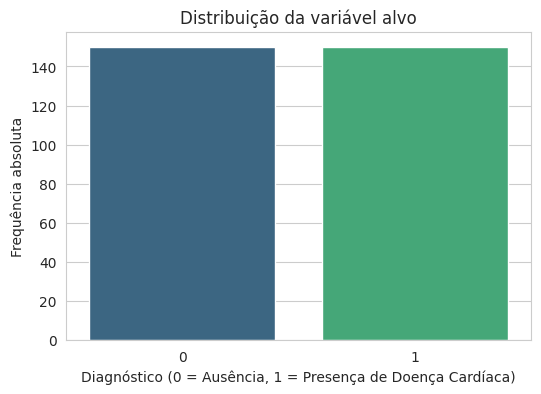

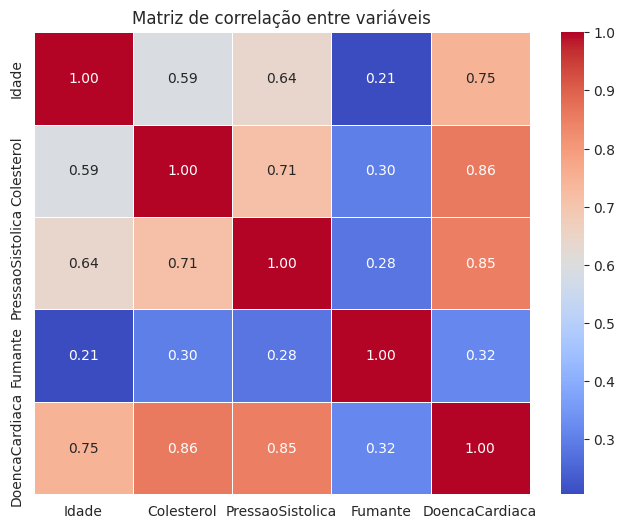

In [2]:
# Definição do caminho do arquivo de dados
caminho_dados = '../data/8.1 - dados_saude_cardiaca.csv'

# Carga dos dados
df_dados = pd.read_csv(caminho_dados)

# Análise da distribuição da variável alvo
plt.figure(figsize=(6, 4))
sns.set_style('whitegrid')
sns.countplot(x='DoencaCardiaca', data=df_dados, palette='viridis')
plt.title('Distribuição da variável alvo')
plt.xlabel('Diagnóstico (0 = Ausência, 1 = Presença de Doença Cardíaca)')
plt.ylabel('Frequência absoluta')
plt.show()

# Análise da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(df_dados.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de correlação entre variáveis')
plt.show()

### 2.3. Pré-processamento e treinamento

Nesta etapa, o conjunto de dados é dividido em variáveis preditoras (`X`) e variável alvo (`y`). Subsequentemente, os dados são segmentados em conjuntos de treino e teste para permitir uma avaliação imparcial da capacidade de generalização do modelo. O modelo de Regressão Logística é então instanciado e treinado com o conjunto de dados de treino.

In [3]:
# Definição das variáveis preditoras (X) e da variável alvo (y)
X = df_dados.drop('DoencaCardiaca', axis=1)
y = df_dados['DoencaCardiaca']

# Divisão dos dados em conjuntos de treino e teste (70% treino, 30% teste)
# O parâmetro random_state garante a reprodutibilidade dos resultados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instanciação do modelo de Regressão Logística
modelo_logistico = LogisticRegression(solver='liblinear')

# Treinamento do modelo com os dados de treino
modelo_logistico.fit(X_train, y_train)

print("Modelo treinado.")

Modelo treinado.


## 3. RESULTADOS

Após o treinamento, o modelo é utilizado para realizar predições no conjunto de teste. A performance do modelo é avaliada quantitativamente por meio do relatório de classificação e da matriz de confusão.

In [4]:
# Realização de predições no conjunto de teste
predicoes = modelo_logistico.predict(X_test)

# Geração do relatório de classificação
print("RELATÓRIO DE CLASSIFICAÇÃO:")
print(classification_report(y_test, predicoes, target_names=['Ausência de Doença', 'Presença de Doença']))

# Geração da matriz de confusão
print("\nMATRIZ DE CONFUSÃO:")
matriz = confusion_matrix(y_test, predicoes)
print(matriz)

RELATÓRIO DE CLASSIFICAÇÃO:
                    precision    recall  f1-score   support

Ausência de Doença       1.00      1.00      1.00        48
Presença de Doença       1.00      1.00      1.00        42

          accuracy                           1.00        90
         macro avg       1.00      1.00      1.00        90
      weighted avg       1.00      1.00      1.00        90


MATRIZ DE CONFUSÃO:
[[48  0]
 [ 0 42]]


## 4. DISCUSSÃO E CONCLUSÃO

A avaliação do modelo de regressão logística indica um desempenho máximo na tarefa de classificação, conforme os resultados obtidos no conjunto de teste.

### 4.1. Análise de performance

O relatório de classificação demonstra que o modelo alcançou uma **acurácia de 100%**. Todas as demais métricas — precisão, revocação (_recall_) e F1-score — também atingiram o valor máximo de 1.00 para ambas as classes. Este resultado indica uma classificação perfeita no conjunto de dados de teste.

A análise da matriz de confusão corrobora essa performance:

- **Verdadeiros Negativos (VN):** 48 (classificados corretamente como 'Ausência de Doença').
- **Falsos Positivos (FP):** 0 (nenhum erro de classificação para pacientes saudáveis).
- **Falsos Negativos (FN):** 0 (nenhum erro de classificação para pacientes doentes).
- **Verdadeiros Positivos (VP):** 42 (classificados corretamente como 'Presença de Doença').

A ausência de Falsos Positivos e Falsos Negativos significa que o modelo não cometeu nenhum erro de classificação neste conjunto de dados específico.

### 4.2. Conclusão

Conclui-se que o modelo de regressão logística desenvolvido atingiu a performance máxima possível no conjunto de teste, classificando corretamente todos os casos.

É importante notar que, embora um resultado de 100% de acurácia seja excelente, ele também justifica uma análise mais aprofundada. Em contextos práticos de aprendizado de máquina, uma performance perfeita pode, ocasionalmente, indicar um problema de vazamento de dados (*data leakage*) ou que o conjunto de teste não é suficientemente representativo ou desafiador.

**Desdobramentos futuros recomendados:**
- **Validação Cruzada Robusta:** Implementar uma técnica como a validação cruzada estratificada (e.g., *Stratified K-Fold*) para garantir que a alta performance se mantém em diferentes subconjuntos dos dados.
- **Validação com Dados Externos:** Testar o modelo treinado em um conjunto de dados completamente novo, proveniente de outra fonte, para verificar sua real capacidade de generalização.
- **Análise de Simplicidade do Problema:** Investigar se as *features* disponíveis tornam o problema linearmente separável, o que explicaria a facilidade com que o modelo encontrou uma solução perfeita.